In [1]:
from Filters import irrFilter
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

32606.61251230319


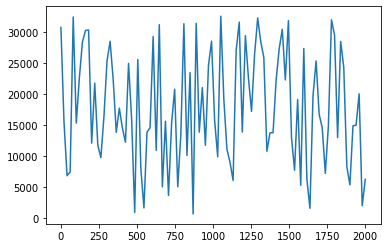

In [4]:
SAMPLES = 100 #1048576
TOP_VALUE = 32767
sounds = np.abs((np.random.rand(SAMPLES)+0.01)*TOP_VALUE)
print(np.max(sounds))
x = np.linspace(0,SAMPLES*20,SAMPLES)
plt.plot(x,sounds)

In [5]:
filtered = irrFilter(sounds)

In [11]:
def testIrrFilter(sounds, filtered):
    correct_filtered = np.zeros(len(sounds))
    for i in range(len(sounds)):
        if i == 0:
            correct_filtered[i] = sounds[i]*0.5 
        else:
            correct_filtered[i] = (sounds[i]*0.5) + (correct_filtered[i-1]*0.5)
    assert np.allclose(filtered, correct_filtered)

In [12]:
testIrrFilter(sounds, filtered)

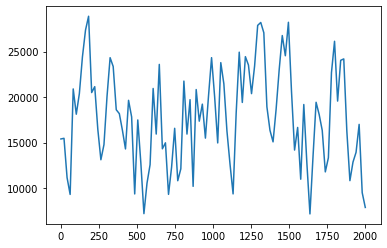

In [13]:
plt.plot(x,filtered)

In [14]:
print(f"{filtered[:3]}...{filtered[len(filtered)-3:]}")

[15396.543 15468.939 11154.403]...[16999.59    9496.048   7873.8057]
